In [6]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
rng = np.random.RandomState(44)
nNormal = 2000
nAnomalous = 200
X_norm = np.r_[0.5 * rng.randn(int(nNormal/2), 2), 0.5 * rng.randn(int(nNormal/2), 2)]
y_norm = nNormal*[0]

X_anomalous = rng.uniform(low= -5, high= 5, size= (nAnomalous, 2))
y_anomalous = nAnomalous*[1]

In [9]:
print(X_norm.shape)
print(X_norm[0:5])

(2000, 2)
[[-0.37530736  0.65817866]
 [ 0.62307001 -0.80245787]
 [-0.73407184 -0.85753523]
 [ 0.92939185  0.04379399]
 [-0.0261611   0.27773582]]


In [12]:
print(X_anomalous.shape)
print(X_anomalous[0:5])

(200, 2)
[[ 0.39541056  1.40113437]
 [-3.79445929  1.65954791]
 [-4.56547585  3.93296689]
 [-1.35396236 -2.32763068]
 [ 3.00952142 -2.85441639]]


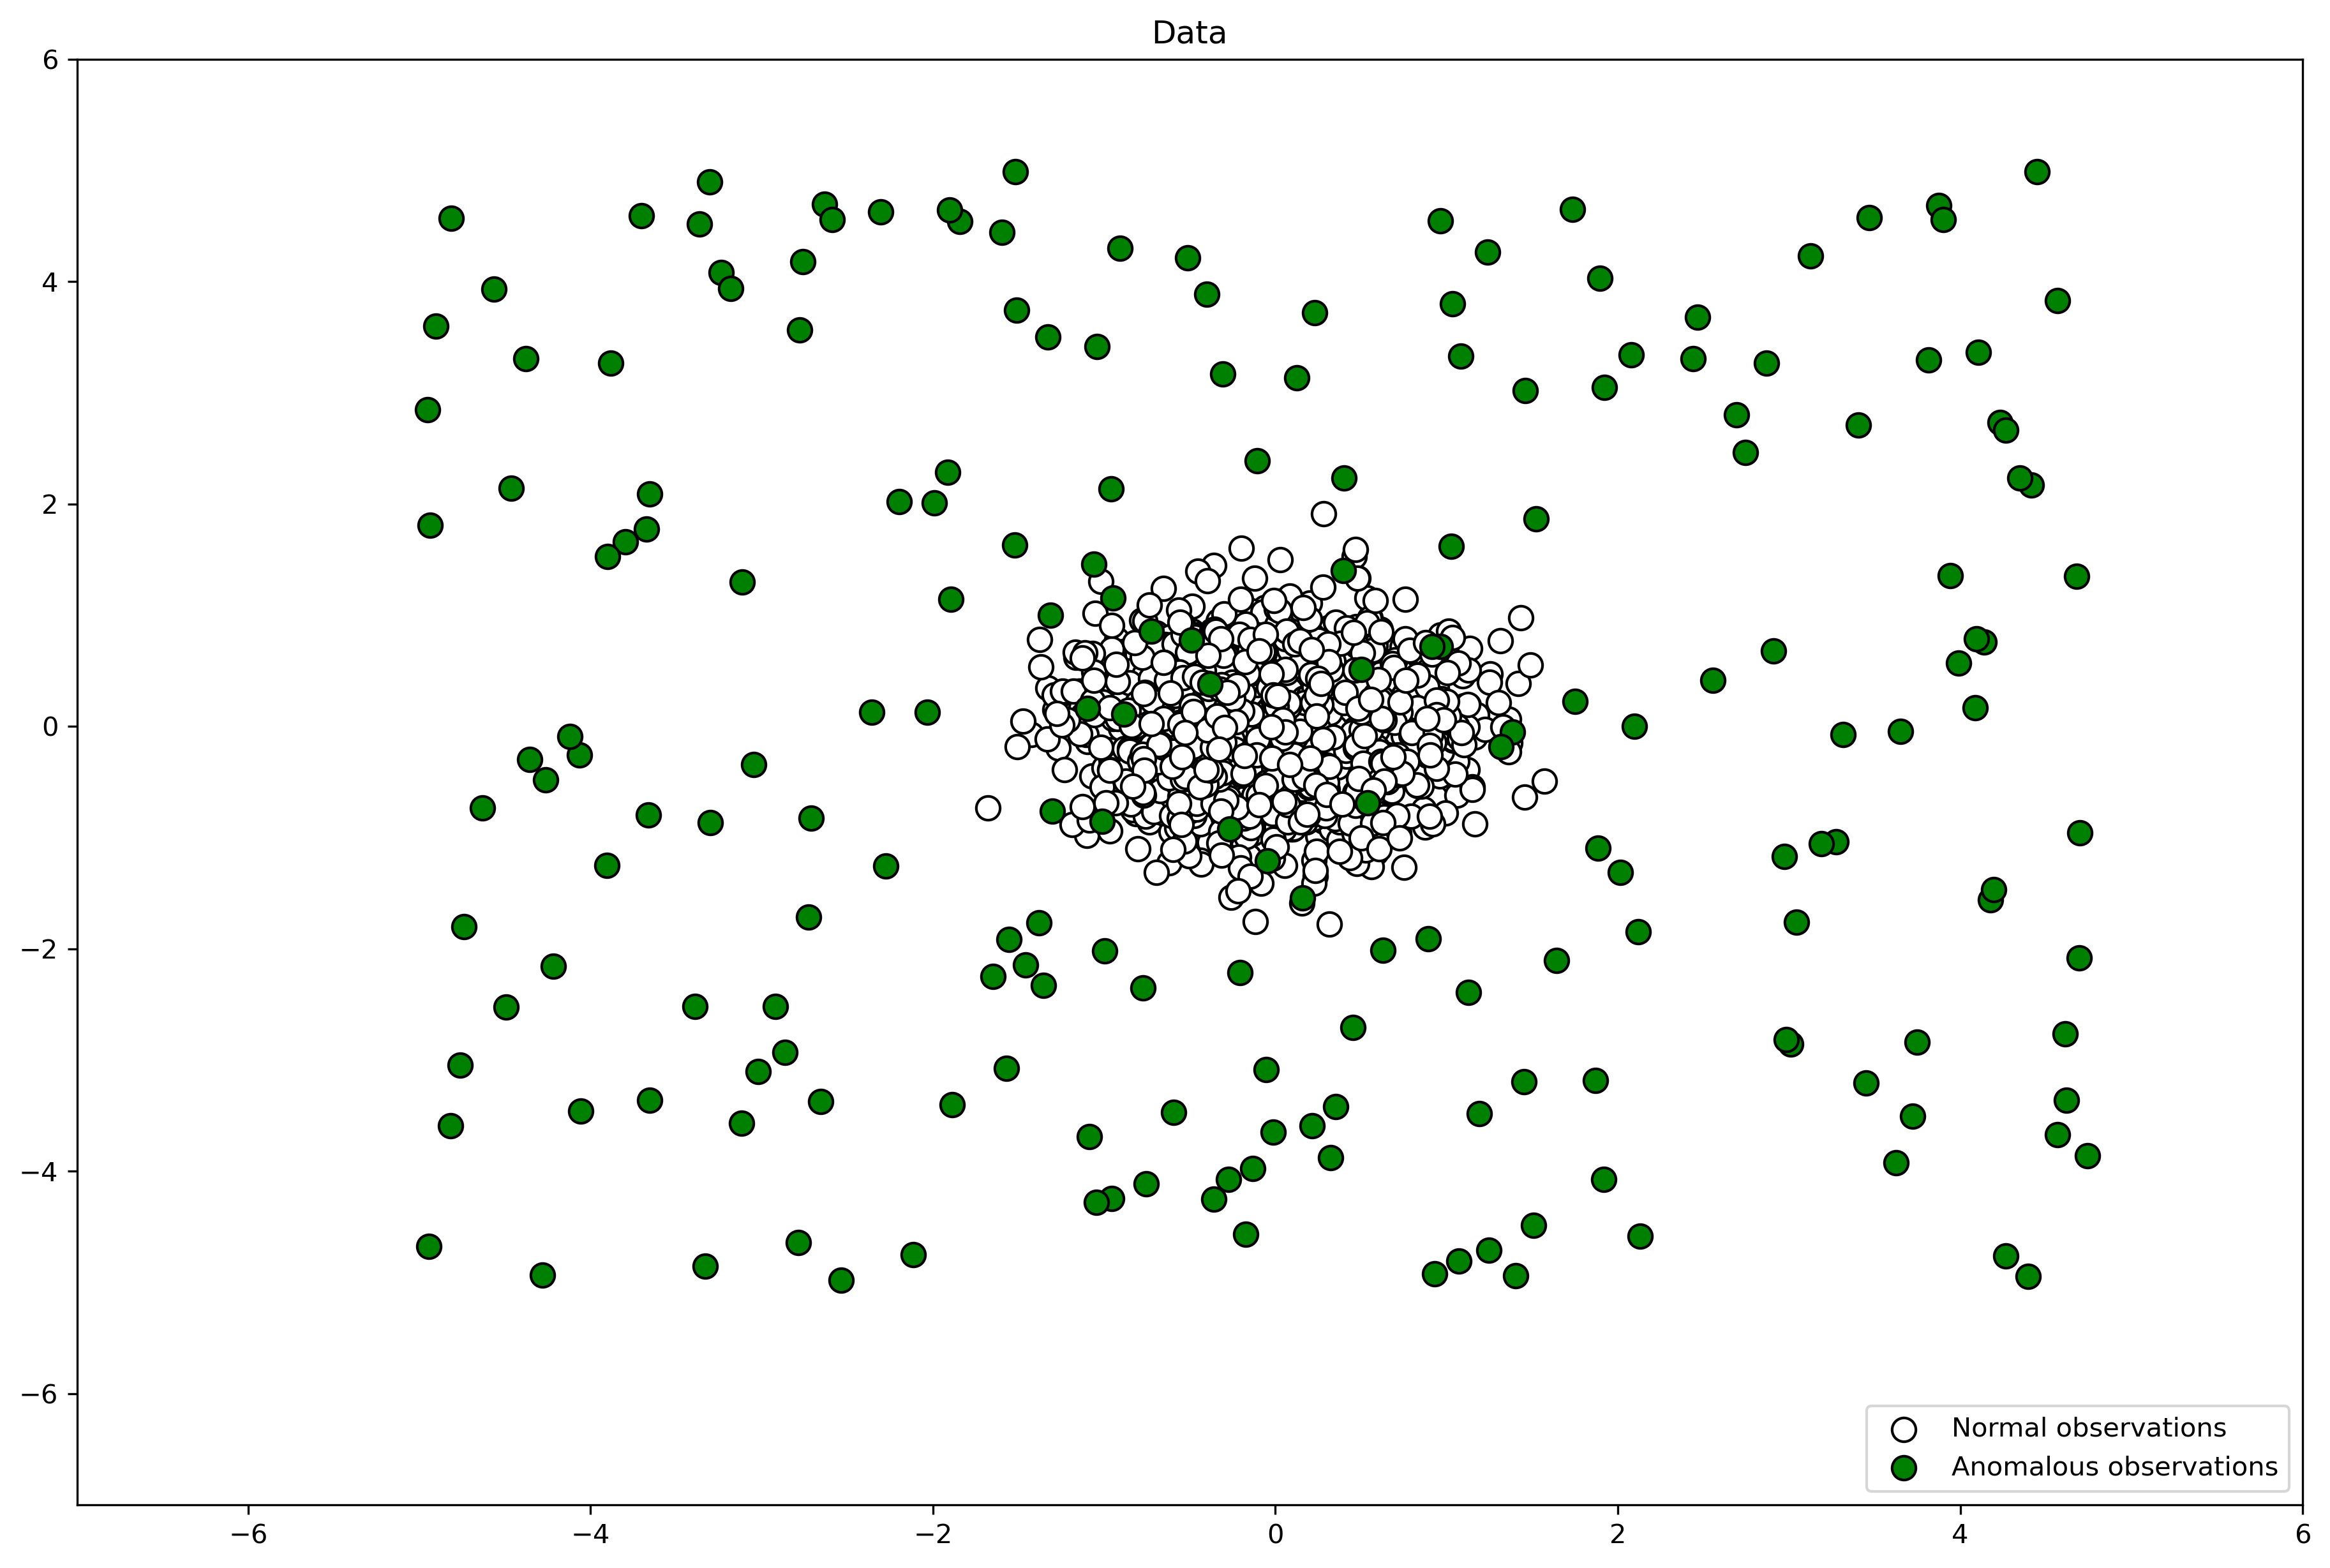

In [13]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = [15, 10]
plt.title('Data')

p1 = plt.scatter(X_norm[:, 0], X_norm[:, 1], c= 'white',
                s = 20*4, edgecolor= 'k')
p2 = plt.scatter(X_anomalous[:, 0], X_anomalous[:, 1], c= 'green', 
                s = 20*4, edgecolor='k')

plt.axis('tight')
plt.xlim((~6, 6))
plt.ylim((~6, 6))
plt.legend([p1, p2],
          ['Normal observations',
          'Anomalous observations'],
          loc = 'lower right')

plt.show()

## Spliting Dataset

In [15]:
from sklearn.model_selection import train_test_split

X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm, y_norm)
X_anoma_train, X_anoma_test, y_anoma_train, y_anoma_test = train_test_split(X_anomalous, y_anomalous, test_size= 0.2)

X_train = np.concatenate([X_norm_train, X_anoma_train])
X_test = np.concatenate([X_norm_test, X_anoma_test])
y_train = np.concatenate([y_norm_train, y_anoma_train])
y_test = np.concatenate([y_norm_test, y_anoma_test])

## Model Isolation Forest

In [16]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest()
clf.fit(X_train)

IsolationForest()

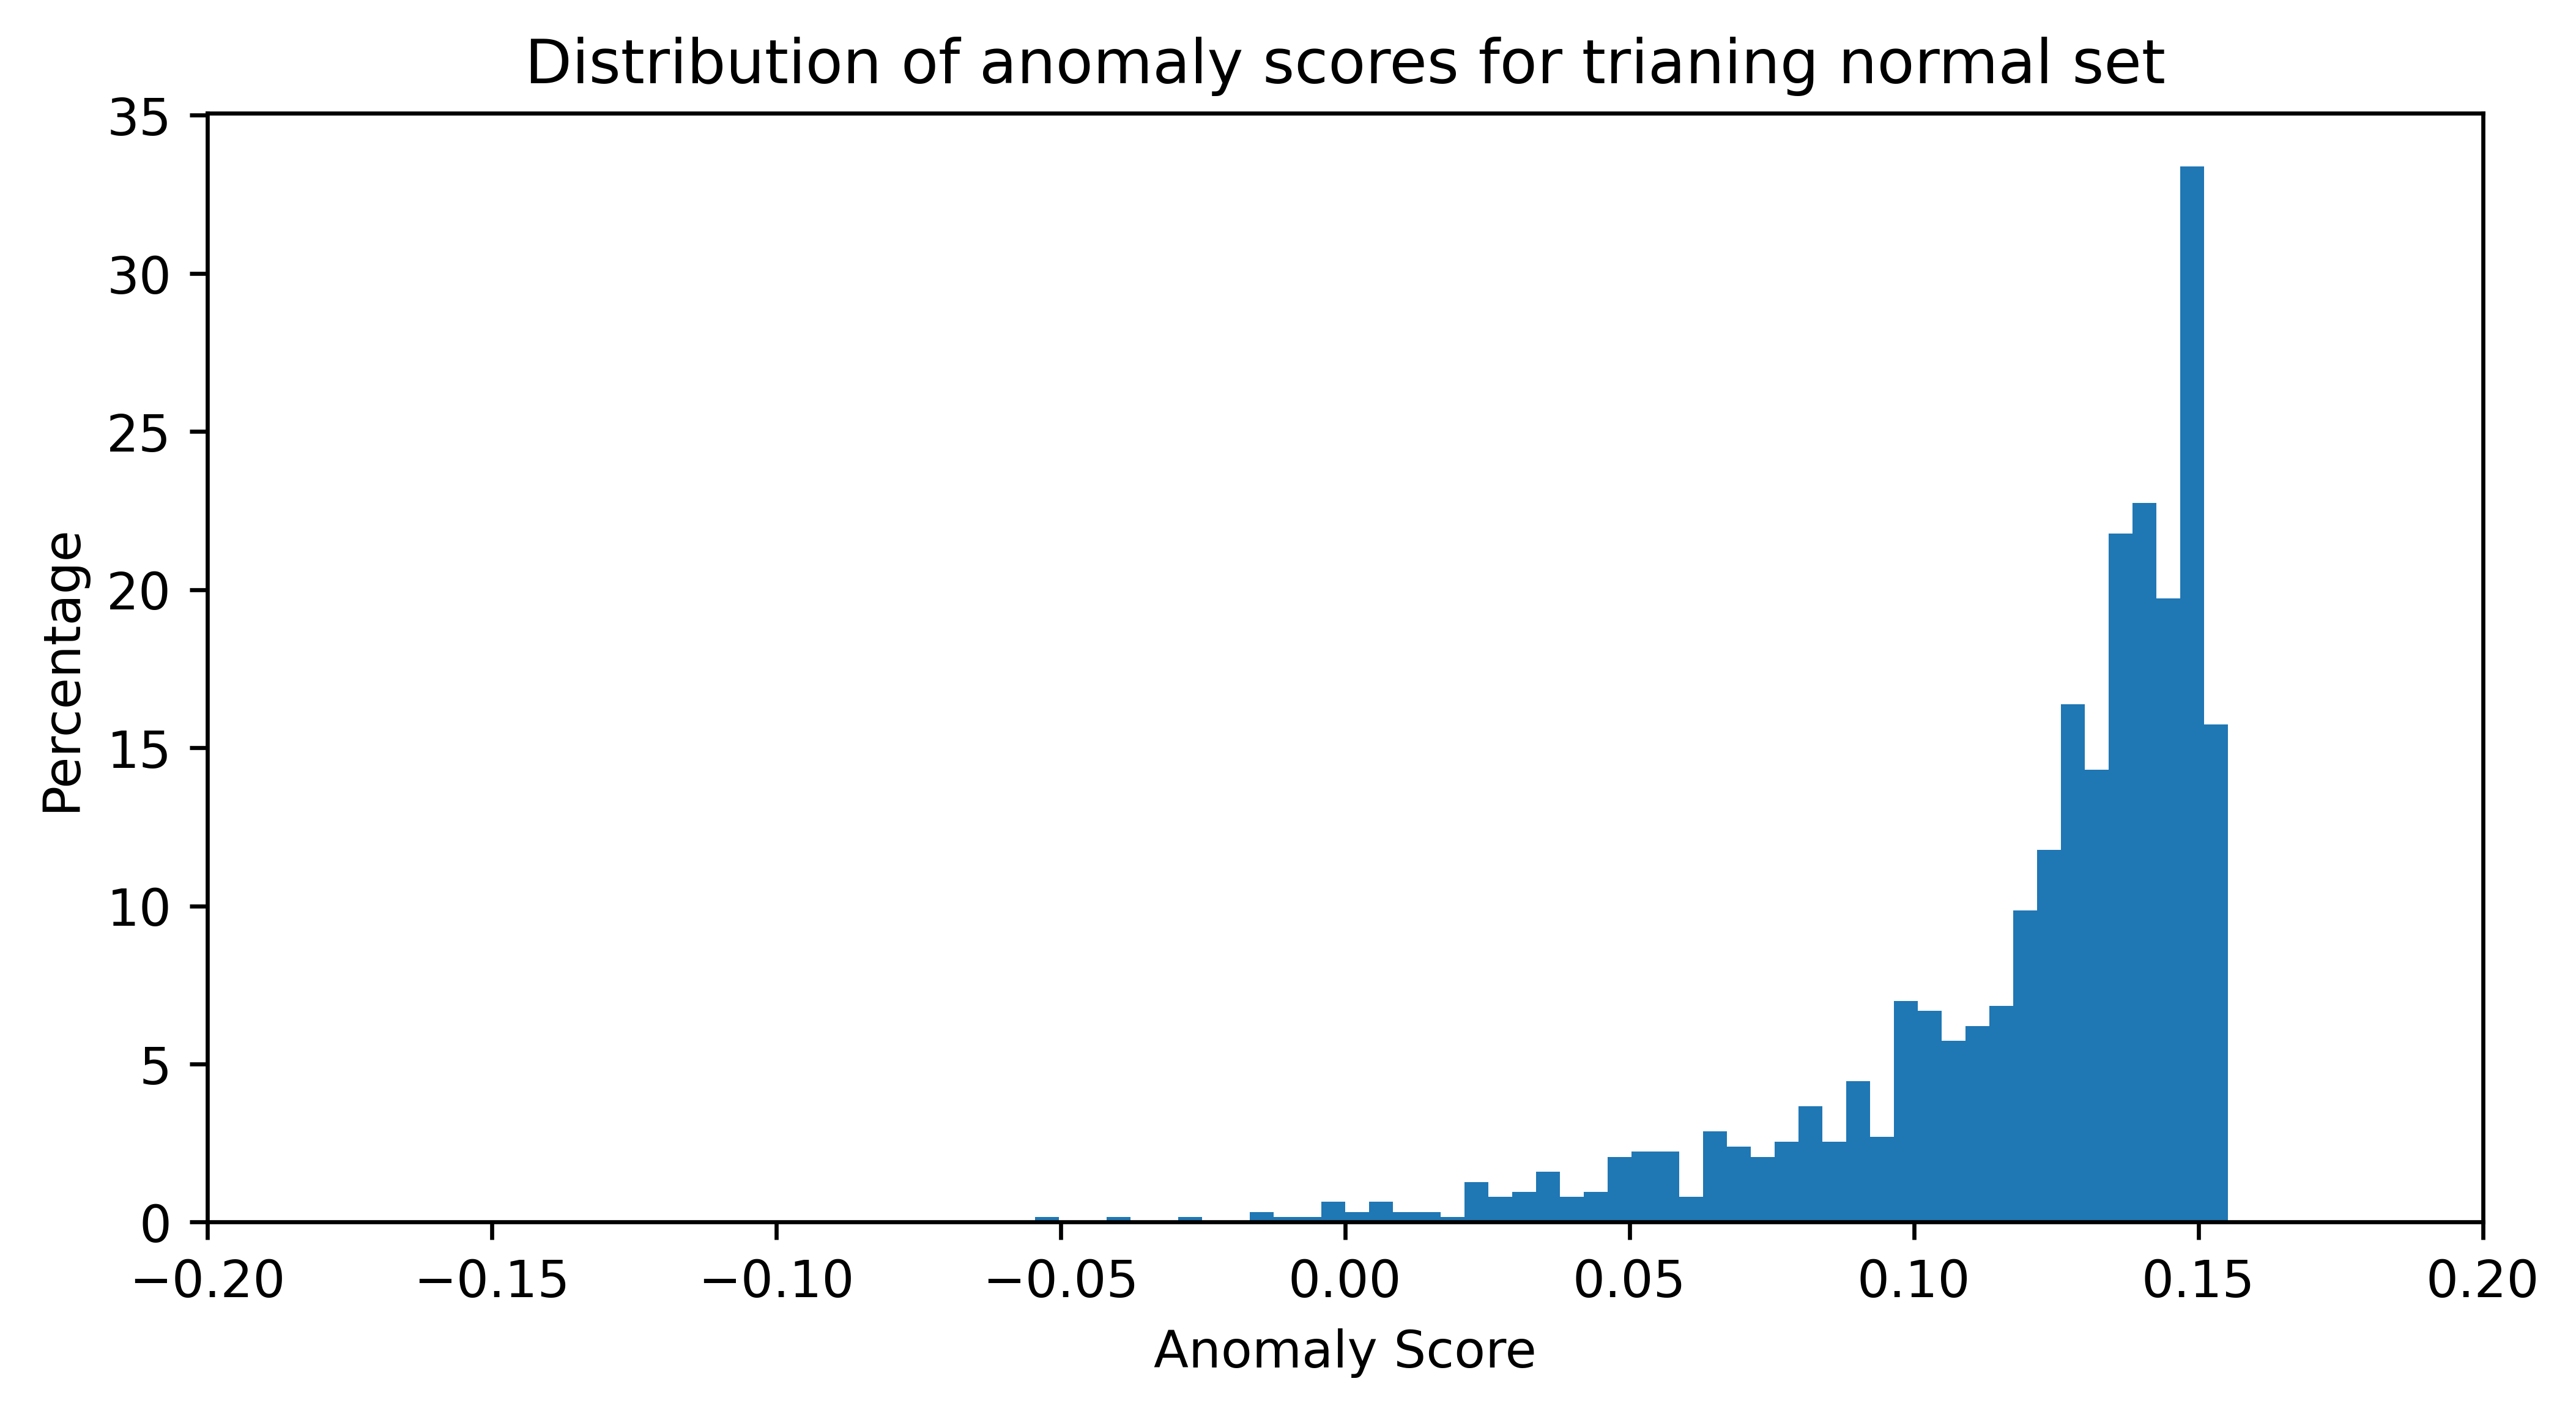

In [20]:
# Compute Decision function
train_scores = clf.decision_function(X_norm_train)
fig = plt.figure(figsize=(8, 4), dpi= 600, facecolor= 'w', edgecolor= 'k')

normal = plt.hist(train_scores, 50, density= True)

plt.xlim(-0.2, 0.2)
plt.xlabel('Anomaly Score')
plt.ylabel('Percentage')
plt.title('Distribution of anomaly scores for trianing normal set')
plt.show()

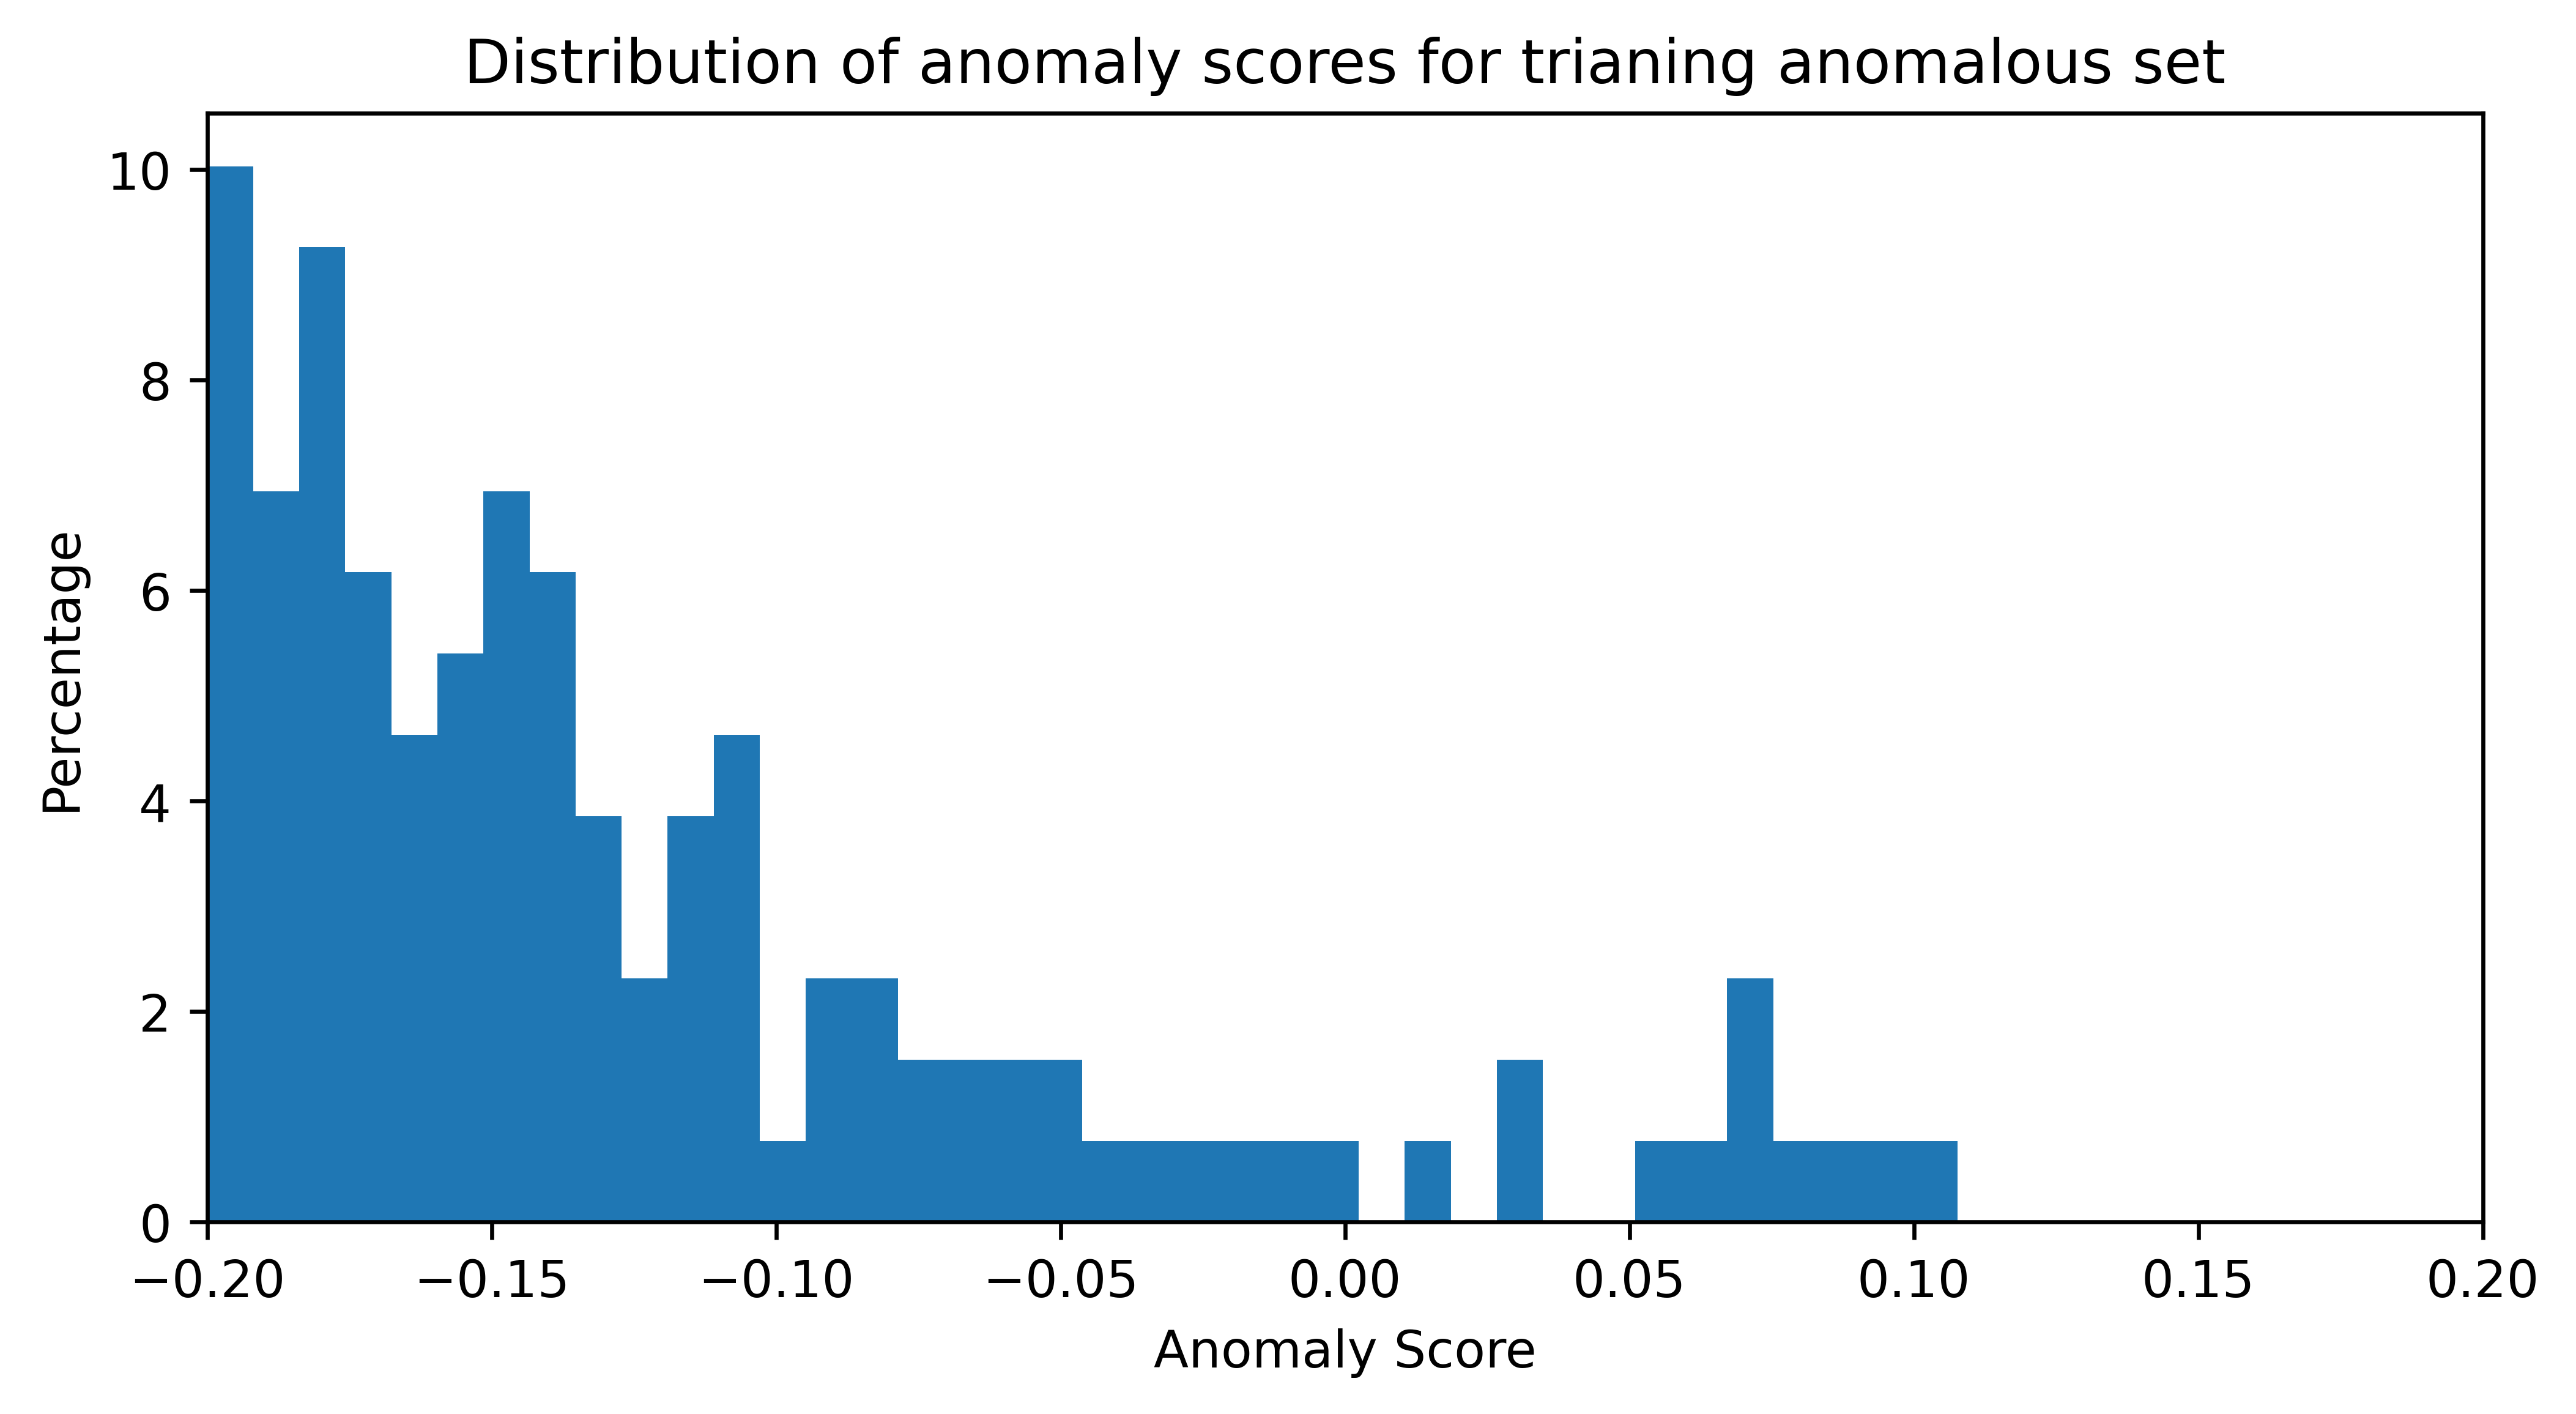

In [22]:
# Compute Decision function
train_scores = clf.decision_function(X_anoma_train)
fig = plt.figure(figsize=(8, 4), dpi= 600, facecolor= 'w', edgecolor= 'k')

normal = plt.hist(train_scores, 50, density= True)

plt.xlim(-0.2, 0.2)
plt.xlabel('Anomaly Score')
plt.ylabel('Percentage')
plt.title('Distribution of anomaly scores for trianing anomalous set')
plt.show()

In [23]:
cutoff = 0.01

In [29]:
# Calculate False Positive Rate
def FPR(y_true, y_pred):
    totalNegatives = sum(y_true==0)
    FP = sum(y_pred[y_true==0]==1)
    return str(float(FP) / float(totalNegatives)* 100)+'%'

In [30]:
# Calculate True Positive Rate
def TPR(y_true, y_pred):
    totalPositives = sum(y_true==1)
    TP = sum(y_pred[y_true==1]==1)
    return str(float(TP) / float(totalPositives)* 100)+'%'

In [34]:
# Measure on Training
print('True Positive Rate '+ TPR(y_train, (cutoff> clf.decision_function(X_train)).astype(int)))
print('False Positive Rate '+ FPR(y_train, (cutoff>clf.decision_function(X_train)).astype(int)))

True Positive Rate 92.5%
False Positive Rate 1.1333333333333333%


In [36]:
# Measure on Testing
print('True Positive Rate '+ TPR(y_test, (cutoff> clf.decision_function(X_test)).astype(int)))
print('False Positive Rate '+ FPR(y_test, (cutoff>clf.decision_function(X_test)).astype(int)))

True Positive Rate 90.0%
False Positive Rate 1.4000000000000001%


### Successful Anomaly Detection !